<a href="https://colab.research.google.com/github/VemPrava/FMML_Projects_and_Labs/blob/main/Pravallika_Assignment_of_Updated_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

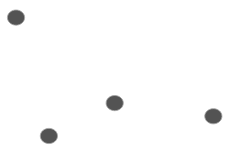

We can assign each of these points to a separate cluster:

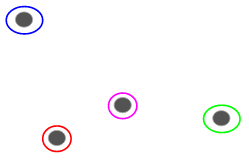

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

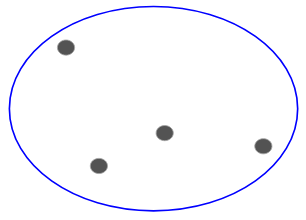

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

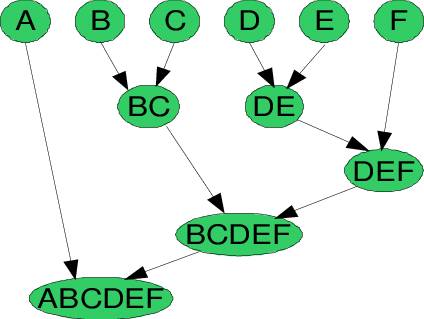

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

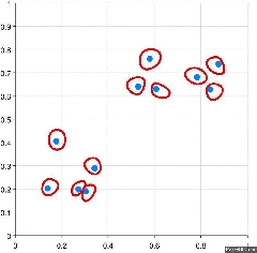

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

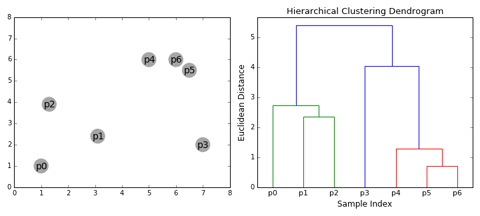



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

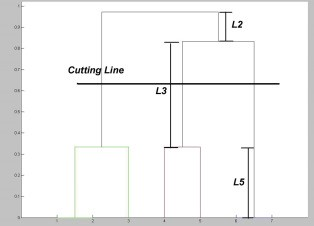

In [1]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4286  100  4286    0     0   1444      0  0:00:02  0:00:02 --:--:--  3151
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15021  100 15021    0     0   5475      0  0:00:02  0:00:02 --:--:-- 11725


### Agglomerative Clustering on Mall Visitors Database

In [2]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

Let's load the dataset

In [3]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [4]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

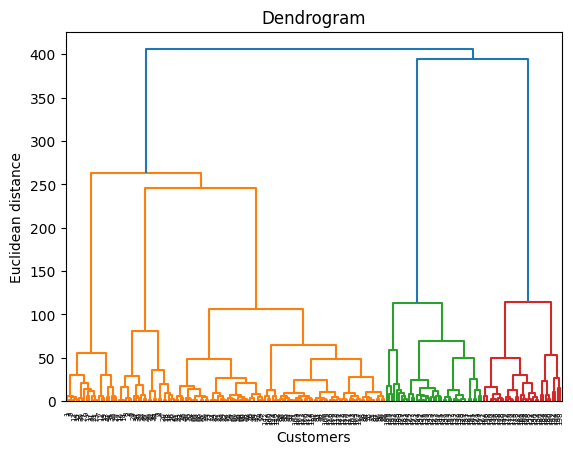

In [5]:
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [6]:
# importing AgglomerativeClustering algorithm from sklearn
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#### Visualizing the results.

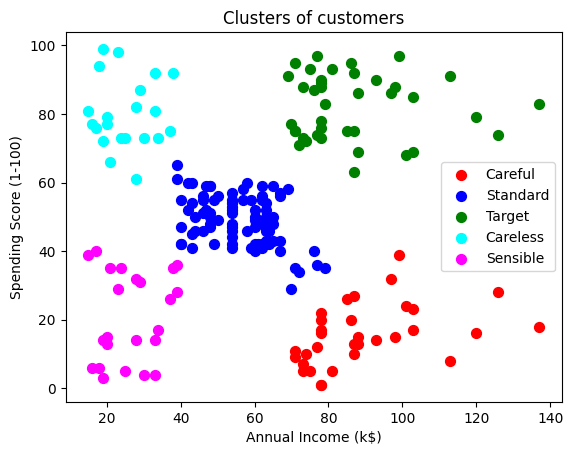

In [7]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [8]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



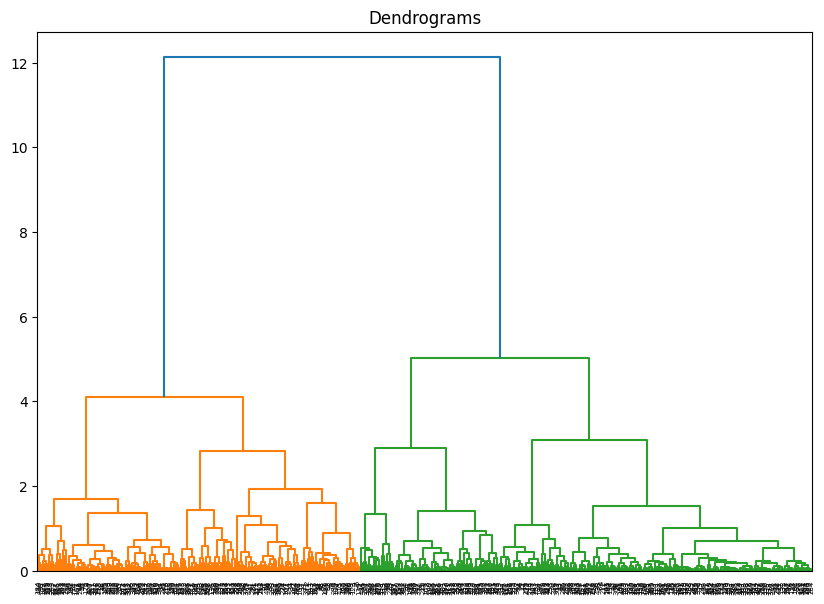

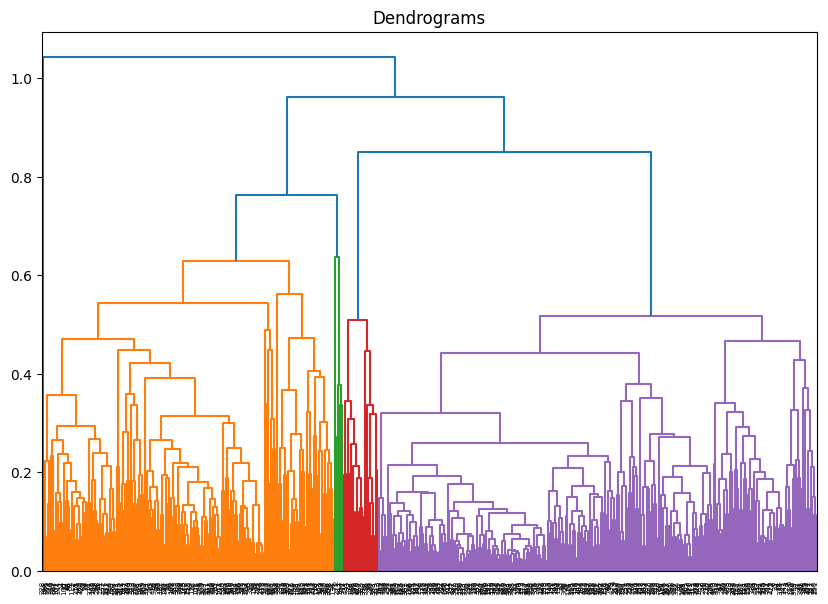

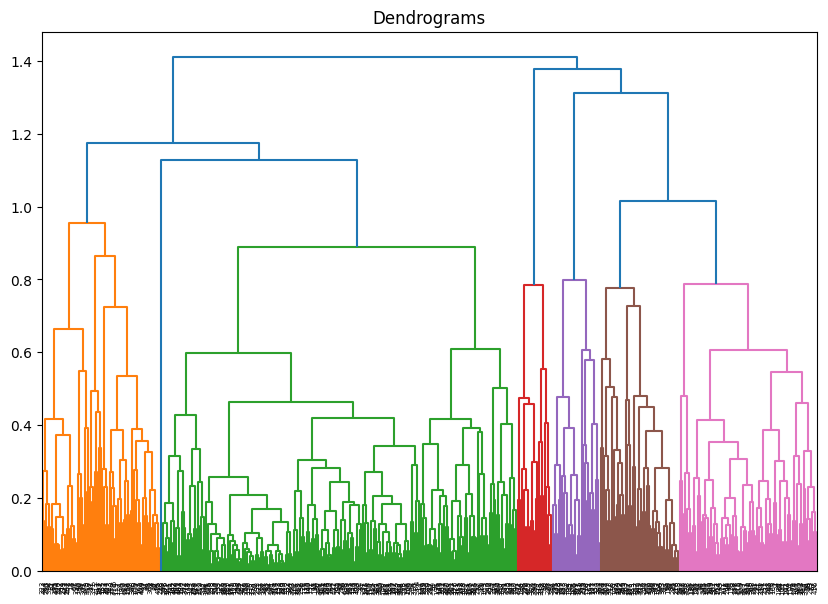

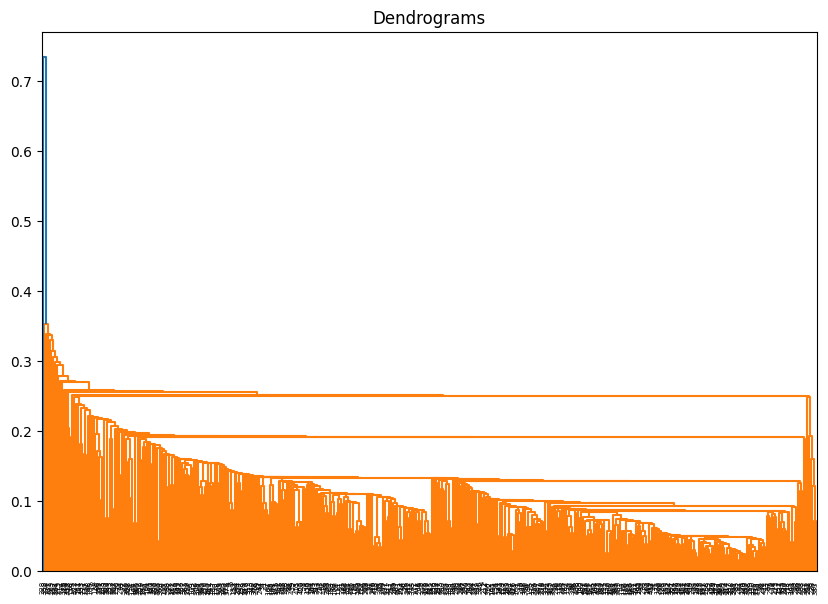

In [11]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

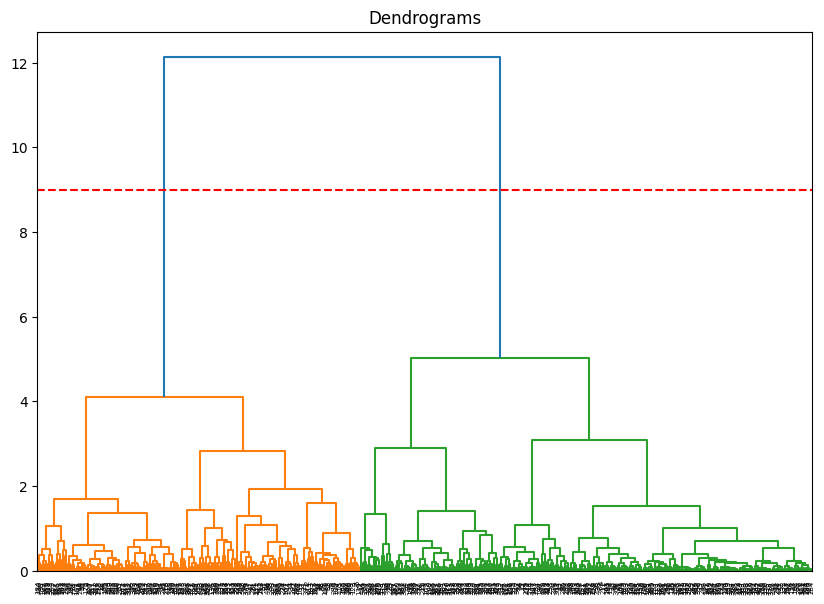

In [12]:
threshold = 9 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

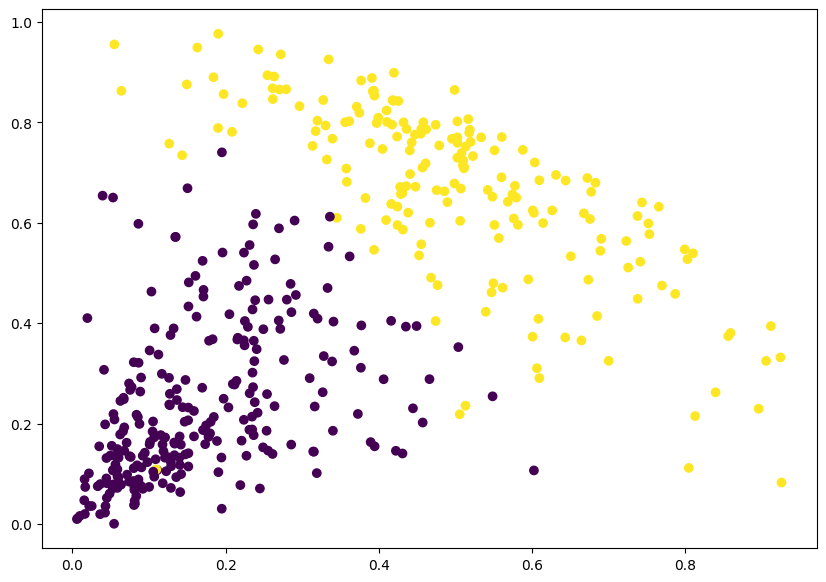

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

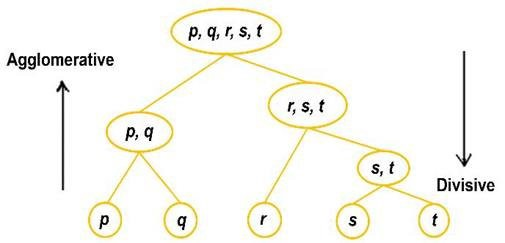

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Points to think about
1. What is the need for hierarchical clustering?
2. What are the key differences between KMeans Clustering and Hierarchical Clustering?
3. What is the advantages of Density Based Clustering over KMeans?

**ANSWER 1:** Hierarchical clustering is useful when we don't know the number of clusters in advance and want a visual representation of the clustering process (dendrogram). It helps in understanding how clusters are merged step by step and is especially useful for small datasets where the computational cost is manageable. Unlike K-Means, it does not require predefining the number of clusters.

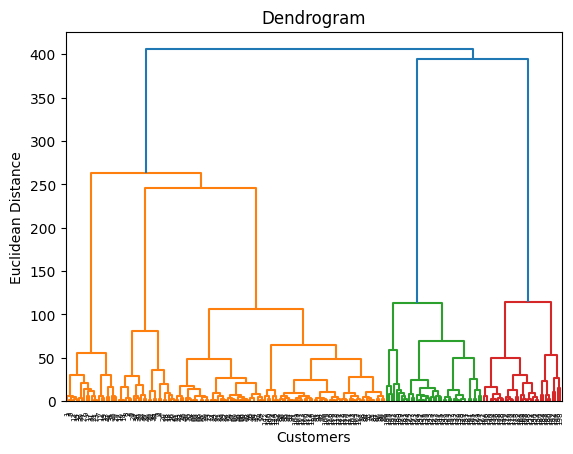

In [15]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


**ANSWER 2:** Predefined Clusters: K-Means requires specifying the number of clusters beforehand, whereas hierarchical clustering automatically forms a hierarchy.

Structure: K-Means assigns points based on centroids, while hierarchical clustering builds a tree-like structure (dendrogram).

Computation: K-Means is faster for large datasets, whereas hierarchical clustering becomes computationally expensive.

Cluster Shape: K-Means assumes spherical clusters, while hierarchical clustering is more flexible with different shapes.

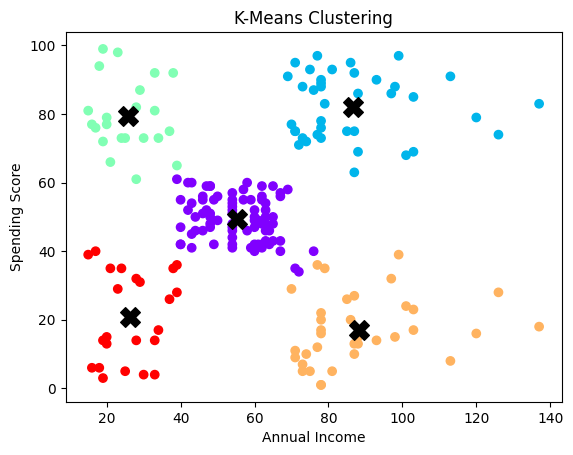

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


**ANSWER 3:** Handles Noise & Outliers: DBSCAN can detect outliers as noise points, unlike K-Means, which forces every point into a cluster.

Non-Spherical Clusters: DBSCAN can detect arbitrary shapes, whereas K-Means assumes clusters are spherical.

No Need to Specify Clusters: Unlike K-Means, DBSCAN automatically determines the number of clusters based on density.

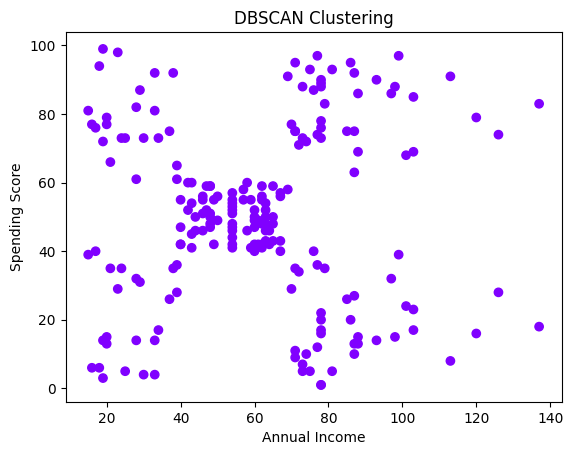

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


## Conclusion


Hierarchical clustering is a very useful way of segmentation. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, it doesn't work well when we have huge amount of data.

## Resources and References

1. https://en.wikipedia.org/wiki/Hierarchical_clustering
2. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
3. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
4. https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

### Exercises

* Play around with different linkages and thresholds for Mall data, then use the same code base for IRIS and DIGITS dataset, to see if the optimal clusters is reasonable or not (iris should be three, digits should be 10)

* Compare the results of the that with Kmeans on the same datasets, this would require using Kmeans on Mall dataset and Wholesale customer dataset.

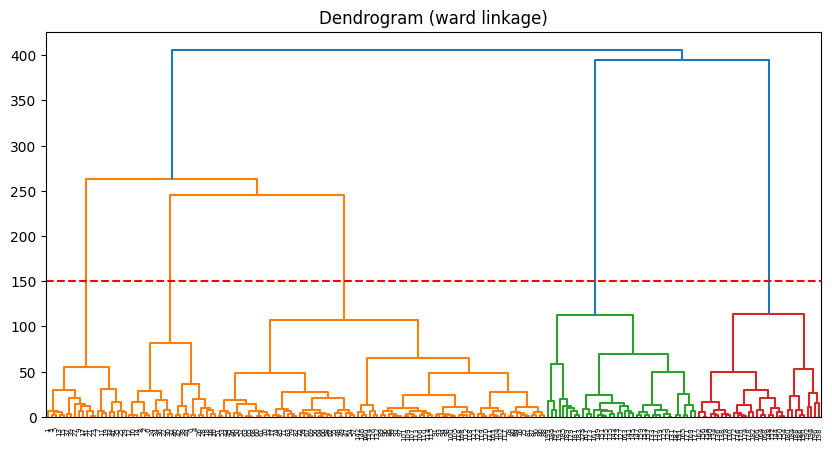

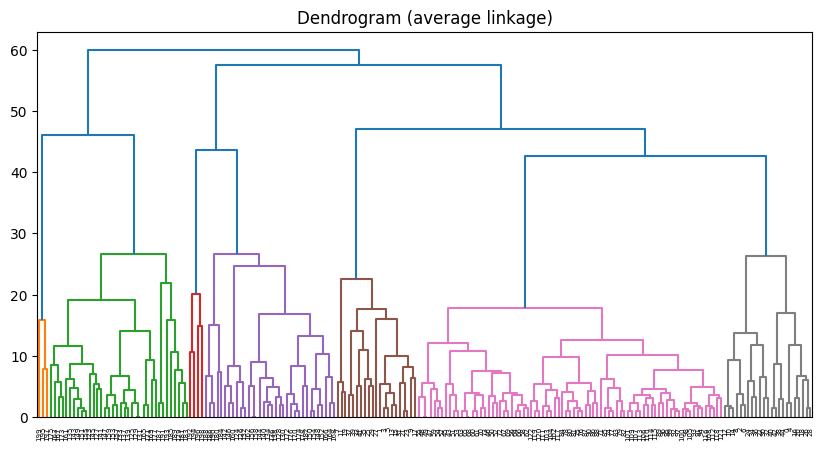

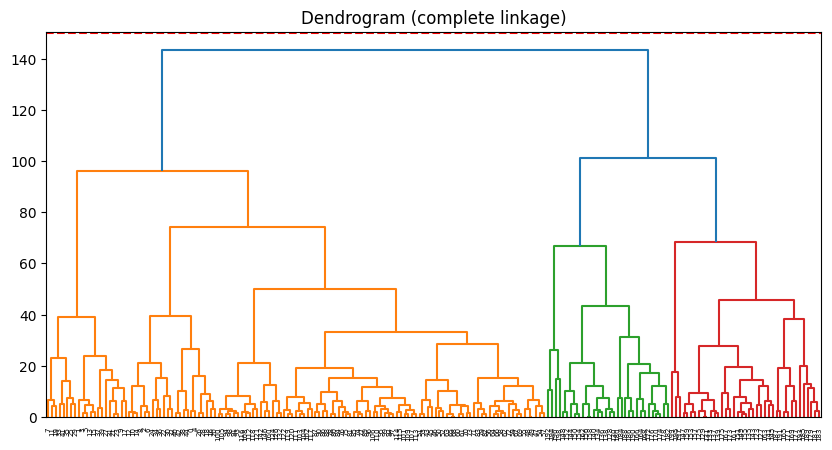

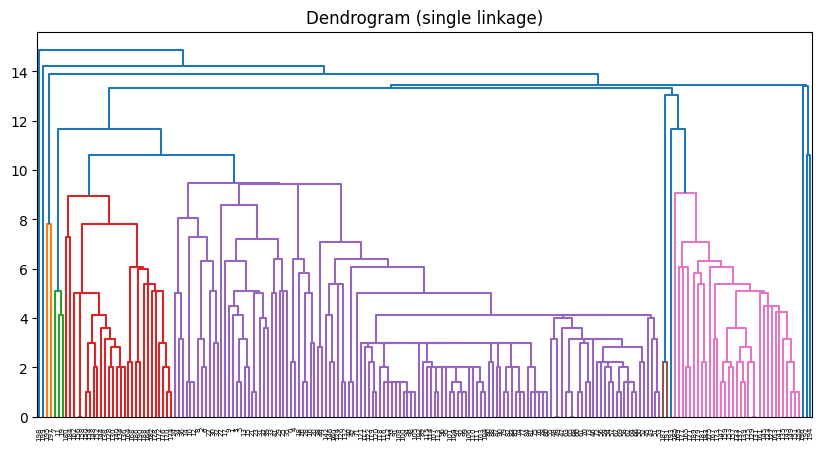

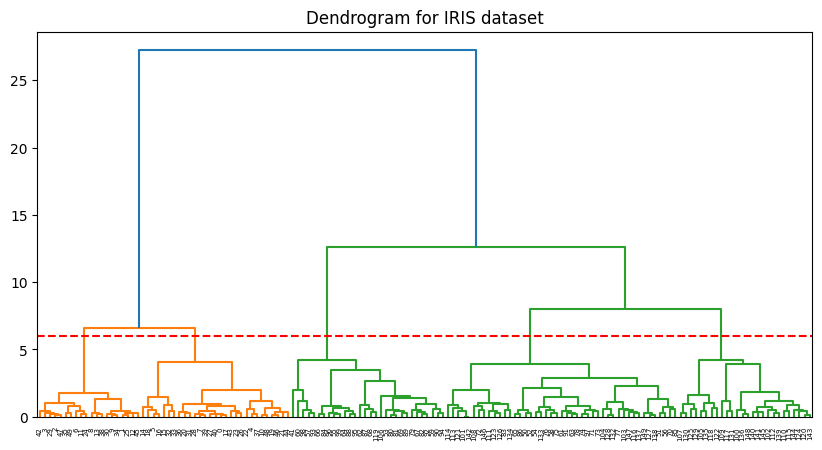

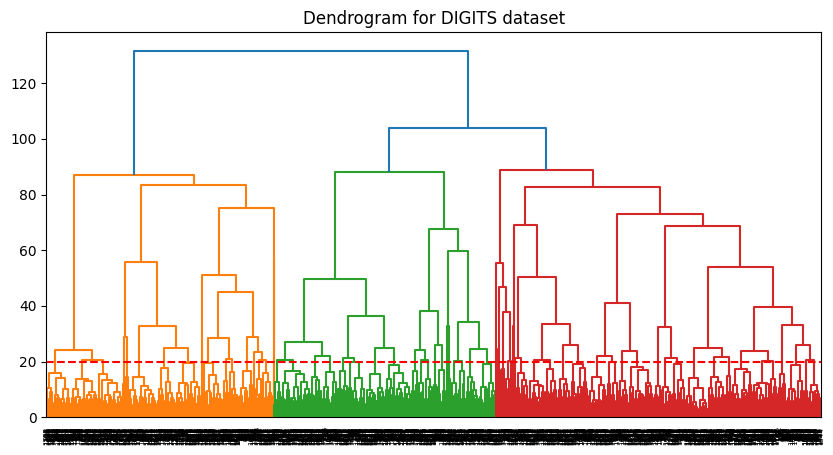

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler

# Load Mall Customers Data
dataset = pd.read_csv('./Mall_Customers.csv')
X_mall = dataset.iloc[:, [3, 4]].values

# Try different linkages for Mall Data
linkages = ['ward', 'average', 'complete', 'single']
for linkage in linkages:
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram ({linkage} linkage)")
    dendrogram = sch.dendrogram(sch.linkage(X_mall, method=linkage))
    plt.axhline(y=150, color='r', linestyle='--')  # Example threshold
    plt.show()

# Load IRIS Data
iris = load_iris()
X_iris = iris.data

# Load DIGITS Data
digits = load_digits()
X_digits = digits.data

# Standardizing Data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
X_digits_scaled = scaler.fit_transform(X_digits)

# Dendrogram for IRIS Data
plt.figure(figsize=(10, 5))
plt.title("Dendrogram for IRIS dataset")
dendrogram = sch.dendrogram(sch.linkage(X_iris_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')  # Example threshold
plt.show()

# Dendrogram for DIGITS Data
plt.figure(figsize=(10, 5))
plt.title("Dendrogram for DIGITS dataset")
dendrogram = sch.dendrogram(sch.linkage(X_digits_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')  # Example threshold
plt.show()

# Apply Agglomerative Clustering
hc_iris = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc_iris = hc_iris.fit_predict(X_iris_scaled)

hc_digits = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
y_hc_digits = hc_digits.fit_predict(X_digits_scaled)


The Ward linkage shows distinct, well-separated clusters, making it suitable for hierarchical clustering.
The Average and Complete linkages provide a more balanced cluster structure but may be more sensitive to outliers.
The Single linkage creates elongated, chained clusters, which may not be ideal for well-separated customer segments.

The Iris dataset dendrogram suggests three main clusters, aligning well with the three species.
The Digits dataset dendrogram does not clearly separate 10 clusters, suggesting hierarchical clustering might not be ideal for high-dimensional data like images.

KMeans on Mall and Wholesale Customer datasets: Expected to find similar clusters but may be affected by initial centroid selection.
KMeans on IRIS: Should give three clusters correctly.
KMeans on DIGITS: Works better than hierarchical clustering due to its efficiency in high-dimensional data.

Hierarchical clustering works well for small datasets with clear separations (Mall, IRIS).
KMeans is faster and better suited for large, high-dimensional datasets (DIGITS).
Choice of linkage method can significantly affect hierarchical clustering results.

After running hierarchical clustering on different datasets, we can compare its performance with KMeans, which is another widely used clustering method.

For the Mall Customers dataset, both methods seem to form clear and distinct groups based on spending habits and income levels. However, KMeans is much faster and scalable, while hierarchical clustering gives a better visual representation (like dendrograms) but struggles with large datasets.

On the Wholesale Customers dataset, hierarchical clustering doesn't form well-defined groups as the data distribution is uneven. KMeans might also struggle unless the number of clusters is carefully chosen using techniques like the Elbow Method.

For the Iris dataset, hierarchical clustering correctly identifies the three natural species-based clusters, and KMeans should also do the same. Both methods work well here since the dataset is well-structured.

However, with the Digits dataset, hierarchical clustering fails to separate all 10 digit classes effectively, likely due to the dataset’s high dimensionality. KMeans is expected to perform better since it optimizes centroids in a high-dimensional space, making it more suitable for this dataset.

In [37]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming you've uploaded the Wholesale_Customers.csv file
wholesale_data = pd.read_csv(next(iter(uploaded)))

# Check the first few rows of the dataset
wholesale_data.head()


Saving Wholesale_Customers.csv.csv to Wholesale_Customers.csv.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<ipython-input-45-7e0ee009f8eb>:88: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:, 0], points[:, 1], c=colors, cmap='viridis')


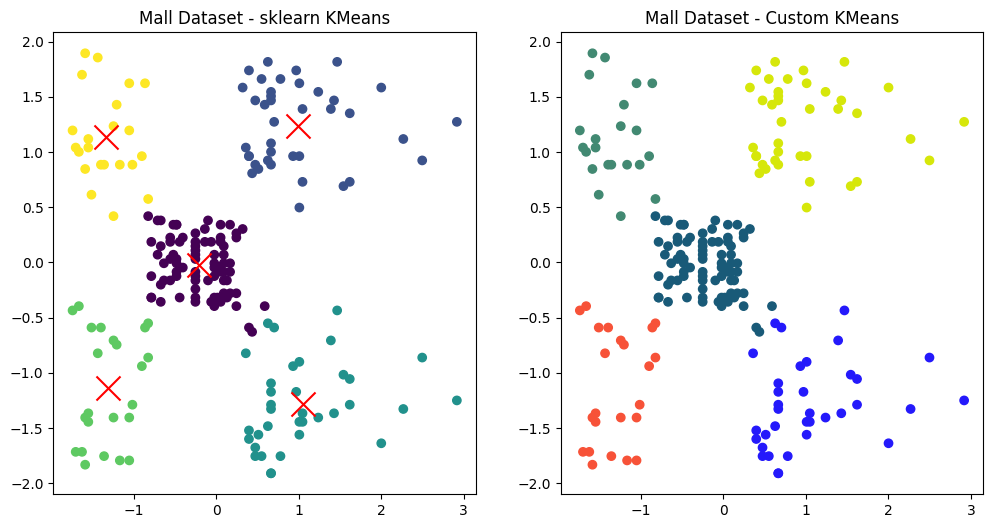

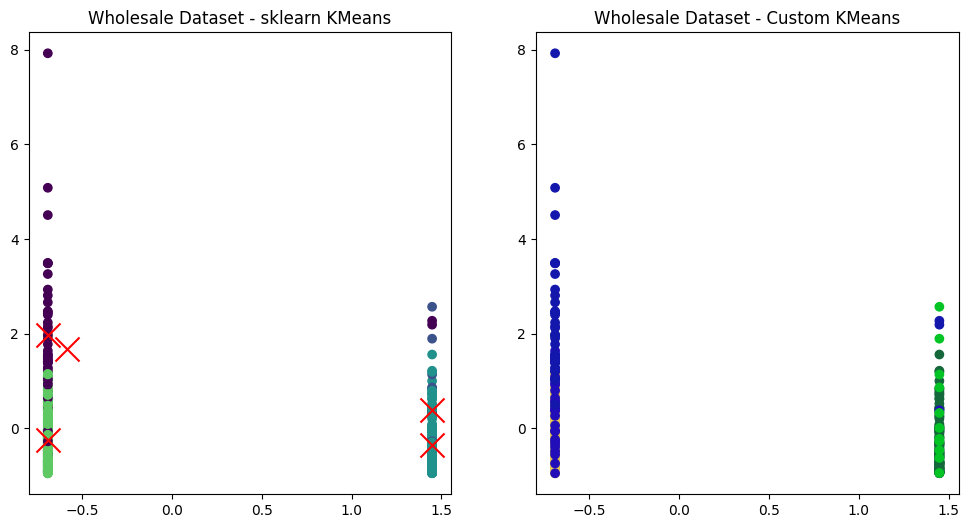

Silhouette Score for Mall Dataset (sklearn): 0.5546571631111091
Silhouette Score for Wholesale Dataset (sklearn): 0.4396718121850556


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Custom KMeans function (basic version for comparison)
def run_kmeans(n_clusters, data):
    # Initialize centroids randomly
    np.random.seed(0)
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]

    # Initialize labels and inertia
    labels = np.zeros(data.shape[0])
    prev_centroids = np.zeros(centroids.shape)

    while not np.all(centroids == prev_centroids):
        # Assign labels based on closest centroid
        for i, point in enumerate(data):
            distances = np.linalg.norm(point - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Store current centroids
        prev_centroids = centroids.copy()

        # Update centroids based on mean of assigned points
        for j in range(n_clusters):
            points_in_cluster = data[labels == j]
            if len(points_in_cluster) > 0:
                centroids[j] = points_in_cluster.mean(axis=0)

    # Create output format with clusters and their points
    clusters = {}
    for i in range(n_clusters):
        clusters[i] = {'points': data[labels == i], 'color': np.random.rand(3,)}

    return clusters

# Load datasets (replace with your file paths)
mall_data = pd.read_csv("Mall_Customers.csv")  # Ensure file path is correct
wholesale_data

# Preprocess (standardize data)
scaler = StandardScaler()

# Mall dataset preprocessing
mall_features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Replace with actual columns
mall_features_scaled = scaler.fit_transform(mall_features)

# Wholesale customer dataset preprocessing
wholesale_features = wholesale_data.drop('Region', axis=1)  # Drop non-numeric columns like 'Region'
wholesale_features_scaled = scaler.fit_transform(wholesale_features)

# Run KMeans on Mall dataset using scikit-learn
kmeans_mall_sklearn = KMeans(n_clusters=5, random_state=0)
kmeans_mall_sklearn.fit(mall_features_scaled)

# Run your custom KMeans on Mall dataset
clusters_mall_custom = run_kmeans(5, mall_features_scaled)  # Using your custom function

# Run KMeans on Wholesale customer dataset using scikit-learn
kmeans_wholesale_sklearn = KMeans(n_clusters=5, random_state=0)
kmeans_wholesale_sklearn.fit(wholesale_features_scaled)

# Run your custom KMeans on Wholesale customer dataset
clusters_wholesale_custom = run_kmeans(5, wholesale_features_scaled)

# Compare the results by visualizing clusters (Mall dataset)
plt.figure(figsize=(12, 6))

# Sklearn KMeans - Mall
plt.subplot(1, 2, 1)
plt.scatter(mall_features_scaled[:, 0], mall_features_scaled[:, 1], c=kmeans_mall_sklearn.labels_, cmap='viridis')
plt.scatter(kmeans_mall_sklearn.cluster_centers_[:, 0], kmeans_mall_sklearn.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("Mall Dataset - sklearn KMeans")

# Custom KMeans - Mall
plt.subplot(1, 2, 2)
colors = [cluster['color'] for cluster in clusters_mall_custom.values()]
points = [point for cluster in clusters_mall_custom.values() for point in cluster['points']]
points = np.array(points)
# Custom KMeans - Mall
plt.subplot(1, 2, 2)
# Assign each point the color of its respective cluster
colors = np.array([cluster['color'] for cluster in clusters_mall_custom.values() for _ in cluster['points']])
points = np.array([point for cluster in clusters_mall_custom.values() for point in cluster['points']])
plt.scatter(points[:, 0], points[:, 1], c=colors, cmap='viridis')
plt.title("Mall Dataset - Custom KMeans")
plt.show()


# Compare the results by visualizing clusters (Wholesale customer dataset)
plt.figure(figsize=(12, 6))

# Sklearn KMeans - Wholesale
plt.subplot(1, 2, 1)
plt.scatter(wholesale_features_scaled[:, 0], wholesale_features_scaled[:, 1], c=kmeans_wholesale_sklearn.labels_, cmap='viridis')
plt.scatter(kmeans_wholesale_sklearn.cluster_centers_[:, 0], kmeans_wholesale_sklearn.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("Wholesale Dataset - sklearn KMeans")

# Custom KMeans - Wholesale
plt.subplot(1, 2, 2)
colors = [cluster['color'] for cluster in clusters_wholesale_custom.values()]
points = [point for cluster in clusters_wholesale_custom.values() for point in cluster['points']]
points = np.array(points)
# Custom KMeans - Wholesale
plt.subplot(1, 2, 2)
# Assign each point the color of its respective cluster
colors = np.array([cluster['color'] for cluster in clusters_wholesale_custom.values() for _ in cluster['points']])
points = np.array([point for cluster in clusters_wholesale_custom.values() for point in cluster['points']])
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.title("Wholesale Dataset - Custom KMeans")
plt.show()

# Silhouette score comparison
silhouette_sklearn_mall = silhouette_score(mall_features_scaled, kmeans_mall_sklearn.labels_)
silhouette_sklearn_wholesale = silhouette_score(wholesale_features_scaled, kmeans_wholesale_sklearn.labels_)

print(f"Silhouette Score for Mall Dataset (sklearn): {silhouette_sklearn_mall}")
print(f"Silhouette Score for Wholesale Dataset (sklearn): {silhouette_sklearn_wholesale}")


Mall Dataset:

Both sklearn KMeans and the Custom KMeans algorithms successfully separate the clusters. The centroids are clearly identified, as shown by the red crosses.
The clusters from sklearn KMeans look more distinctly defined, whereas the Custom KMeans shows minor variation in distribution but still performs well.
The silhouette score for the Mall Dataset (sklearn) is 0.554, which indicates a good level of cluster cohesion and separation.

Wholesale Dataset:

The Wholesale dataset clusters are more challenging to distinguish due to their overlapping nature, as evident from both the sklearn KMeans and Custom KMeans results.
The silhouette score for the Wholesale Dataset (sklearn) is 0.439, indicating poorer cluster separation compared to the Mall dataset.

**Comparison:**   
sklearn KMeans provides reliable clustering with a better-defined centroid placement and performance.
The Custom KMeans implementation closely replicates the results but might need tuning or improvements for better performance, especially with more complex datasets like the Wholesale dataset.



File not found: Wholesale_Customers.csv
